### Install required packages (one time setup)

In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install sklearn
! pip install xgboost

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load given data

In [85]:
# Load spreadsheet
xl = pd.ExcelFile('assessment.xlsx')

# Load a sheet into a DataFrame by name
df = xl.parse('Data')
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset and basic info
df_info = df.info()
df_head = df.head()
df_describe = df.describe

df_head, df_info, df_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66083 entries, 0 to 66082
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   C_ID             66083 non-null  int64  
 1   C_AGE            66083 non-null  int64  
 2   C_EDU            27619 non-null  object 
 3   C_HSE            22167 non-null  object 
 4   PC               65597 non-null  float64
 5   INCM_TYP         36617 non-null  float64
 6   gn_occ           65205 non-null  object 
 7   NUM_PRD          66083 non-null  int64  
 8   CASATD_CNT       40991 non-null  float64
 9   MTHCASA          39045 non-null  float64
 10  MAXCASA          39045 non-null  float64
 11  MINCASA          39045 non-null  float64
 12  DRvCR            29708 non-null  float64
 13  MTHTD            14100 non-null  float64
 14  MAXTD            14100 non-null  float64
 15  Asset value      66083 non-null  float64
 16  HL_tag           2368 non-null   float64
 17  AL_tag      

(   C_ID  C_AGE     C_EDU                  C_HSE       PC  INCM_TYP  \
 0  1443     65   Masters  EXECUTIVE CONDOMINIUM  19250.0       6.0   
 1  1559     86  O-Levels    PRIVATE CONDOMINIUM  99018.0       2.0   
 2  1913     69  A-Levels                    NaN  10155.0       3.0   
 3  2032     70       NaN                    NaN  21863.0       2.0   
 4  2048     72  O-Levels  EXECUTIVE CONDOMINIUM  10641.0       NaN   
 
         gn_occ  NUM_PRD  CASATD_CNT   MTHCASA   MAXCASA   MINCASA  \
 0         PMEB        3         8.0   6896.91   4899.08    910.88   
 1         PMEB        4        13.0  51714.78  35740.55   1318.25   
 2         PMEB        4         1.0   5420.09   5420.09   5420.09   
 3      RETIREE        3         1.0  13596.65  13596.65  13596.65   
 4  BLUE COLLAR        4         2.0  51639.18  32689.93  18949.25   
 
           DRvCR      MTHTD      MAXTD  Asset value  HL_tag  AL_tag  \
 0  1.020768e+06  105000.00   25000.00    111896.91     NaN     NaN   
 1  8.32

In [3]:
df.describe()

,C_ID,C_AGE,PC,INCM_TYP,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT
count,66083.000000,66083.000000,65597.000000,36617.000000,66083.000000,40991.000000,3.904500e+04,3.904500e+04,3.904500e+04,2.970800e+04,1.410000e+04,1.410000e+04,6.608300e+04,2368.0,5587.0,5.585000e+03,2.678000e+03,2.678000e+03,2678.000000,17073.000000,11733.000000,11733.000000,11733.000000,1.173300e+04,11733.000000,47744.000000
mean,41321.249111,52.357429,43249.703264,3.791709,2.097983,1.727867,1.614598e+04,1.544520e+04,1.317587e+04,3.663201e+04,1.075480e+05,6.738959e+04,3.606658e+04,1.0,1.0,1.247173e+05,4.562678e+04,5.207089e+04,1.447722,1433.442515,2812.945083,382.766932,848.137686,1.017765e+04,64.922952,5408.238040
std,27485.202813,14.323447,25671.057340,1.717852,1.093081,1.411307,6.683559e+04,6.505494e+04,5.443935e+04,1.330104e+05,1.770551e+05,1.166629e+05,1.161096e+05,0.0,0.0,8.775365e+04,5.447327e+04,6.140188e+04,0.920481,5016.886579,7971.455090,1028.178858,2690.348744,3.228418e+04,85.592620,13220.464962
min,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,-2.094051e+05,-2.094051e+05,-2.094051e+05,0.000000e+00,7.976200e+02,7.976200e+02,0.000000e+00,1.0,1.0,1.360000e+04,6.750000e-02,7.000000e-02,1.000000,0.000000,0.100000,0.040000,0.008333,1.000000e-01,1.000000,0.000000
25%,17402.000000,42.000000,21636.000000,2.000000,1.000000,1.000000,1.081280e+03,1.066780e+03,1.011870e+03,7.509496e+00,3.500000e+04,3.000000e+04,0.000000e+00,1.0,1.0,7.411100e+04,1.704585e+04,2.008031e+04,1.000000,16.196667,360.000000,26.820000,83.269167,9.992300e+02,8.000000,0.000000
50%,37643.000000,52.000000,41101.000000,4.000000,2.000000,1.000000,4.142560e+03,4.015310e+03,3.250600e+03,3.000000e+03,6.000000e+04,5.000000e+04,1.040360e+03,1.0,1.0,9.949764e+04,3.303736e+04,3.818595e+04,1.000000,126.095000,1193.390000,96.540000,327.046667,3.924560e+03,29.000000,0.000000
75%,62866.500000,63.000000,60776.000000,5.000000,3.000000,2.000000,1.362005e+04,1.302010e+04,1.088527e+04,3.000000e+04,1.200000e+05,7.500000e+04,3.124843e+04,1.0,1.0,1.538000e+05,5.767421e+04,6.547499e+04,2.000000,966.522500,3122.730000,366.000000,980.294167,1.176353e+04,88.000000,6900.000000
max,99996.000000,122.000000,99953.000000,8.000000,9.000000,39.000000,6.534839e+06,6.534839e+06,6.534839e+06,1.163500e+07,7.909500e+06,7.909500e+06,7.940605e+06,1.0,1.0,1.414900e+06,1.205991e+06,1.338365e+06,14.000000,201404.830000,296448.220000,24985.420000,129262.150830,1.551146e+06,1445.000000,380000.000000


#### Just by looking into basic statistics we can see that min C_AGE =2, let's see some details below,

From result we can clearly see that this is an error in data, since AGE=2 , can't be retiree.

In [87]:
df[df["C_AGE"]==2]

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
36911,57783,2,NaN,NaN,11212.0,NaN,RETIREE,2,1.0,964.45,964.45,964.45,91.02,NaN,NaN,964.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL


In [72]:
print(df[df["C_AGE"]==2])
#remove dataframe with C_AGE=2
df = df[df["C_AGE"]!=2]

        C_ID  C_AGE C_EDU C_HSE       PC  INCM_TYP   gn_occ  NUM_PRD  \
36911  57783      2   NaN   NaN  11212.0       NaN  RETIREE        2   

       CASATD_CNT  MTHCASA  MAXCASA  MINCASA  DRvCR  MTHTD  MAXTD  \
36911         1.0   964.45   964.45   964.45  91.02    NaN    NaN   

       Asset value  HL_tag  AL_tag  pur_price_avg  UT_AVE  MAXUT  N_FUNDS  \
36911       964.45     NaN     NaN            NaN     NaN    NaN      NaN   

       CC_AVE  MAX_MTH_TRN_AMT  MIN_MTH_TRN_AMT  AVG_TRN_AMT  ANN_TRN_AMT  \
36911     NaN              NaN              NaN          NaN          NaN   

       ANN_N_TRX  CC_LMT   C_seg  
36911        NaN     0.0  NORMAL  


#### We can identify any other records where most of products have NaN value

We will check for these columns: CASATD_CNT, HL_tag, AL_tag, N_FUNDS, ANN_N_TRX

In [88]:
# Count records where CASATD_CNT, HL_tag, AL_tag, N_FUNDS, ANN_N_TRX are all NaN
df_nan = df[df['CASATD_CNT'].isnull() & df['HL_tag'].isnull() & df['AL_tag'].isnull() & df['N_FUNDS'].isnull() & df['ANN_N_TRX'].isnull()]
print(df[df['CASATD_CNT'].isnull() & df['HL_tag'].isnull() & df['AL_tag'].isnull() & df['N_FUNDS'].isnull() & df['ANN_N_TRX'].isnull()].shape[0])
df_nan.tail(10)

13471


,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
66037,21892,36,NaN,NaN,51446.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66039,21940,31,Degree,NaN,88455.0,6.0,WHITE COLLAR,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,89500.0,NORMAL
66046,22087,64,NaN,NaN,10406.0,NaN,BLUE COLLAR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66050,22131,36,NaN,NaN,30414.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66056,22197,37,NaN,NaN,24207.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
66058,22220,30,NaN,NaN,23316.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
66067,22335,39,NaN,NaN,21221.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66070,22374,40,NaN,NaN,60004.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66076,22498,35,NaN,NaN,8978.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
66078,22522,41,NaN,NaN,70449.0,NaN,BLUE COLLAR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL


In [89]:
# show record where NUM_PRD > 1
df_nan[df_nan['NUM_PRD']>1][['C_ID','NUM_PRD','CASATD_CNT', 'HL_tag', 'AL_tag', 'N_FUNDS', 'ANN_N_TRX','C_seg']].tail(5)

,C_ID,NUM_PRD,CASATD_CNT,HL_tag,AL_tag,N_FUNDS,ANN_N_TRX,C_seg
65856,16777,2,NaN,NaN,NaN,NaN,NaN,NORMAL
65865,17211,2,NaN,NaN,NaN,NaN,NaN,NORMAL
65866,17293,2,NaN,NaN,NaN,NaN,NaN,NORMAL
65929,19536,2,NaN,NaN,NaN,NaN,NaN,NORMAL
66039,21940,2,NaN,NaN,NaN,NaN,NaN,NORMAL


In [90]:
# remove records where CASATD_CNT, HL_tag, AL_tag, N_FUNDS, ANN_N_TRX are all NaN
df = df.dropna(subset=['CASATD_CNT', 'HL_tag', 'AL_tag', 'N_FUNDS', 'ANN_N_TRX'], how='all')
df.shape[0]

52612

#### Create columns for different products like CASA,TD,LOAN,FUNDS,CC, all columns have onloy 2 values either 0(False) or 1(True), which signify presence of specific product in customer features.

In [91]:
from data_prep import create_product_features,datatype_cleanup

df_product = create_product_features(df)
# concatenate the two dataframes
df = pd.concat([df, df_product], axis=1)
df[['C_ID','IS_TD','IS_CASA','IS_FUNDS','IS_FUNDS','IS_LOAN','C_seg']].head()

,C_ID,IS_TD,IS_CASA,IS_FUNDS,IS_FUNDS,IS_LOAN,C_seg
0,1443,1,1,0,0,0,AFFLUENT
1,1559,1,1,0,0,0,AFFLUENT
2,1913,0,1,1,1,0,AFFLUENT
3,2032,0,1,1,1,0,AFFLUENT
4,2048,0,1,1,1,0,AFFLUENT


#### Find out first if there exist duplicates by C_ID ?

There seems to exist duplicates by Customer ID, we can resolve this by taking latest information about user based on timestamp(but doesn't exist in our data), but it also seems like problem while creating dummy Customer ID, since duplicate record seems to be wildly different from each other.


Take C_ID = 11
gn_occ='RETIREE' should be latest compared to 'PMEB', but C_EDU='Masters' is higher than 'A-Levels'.

So for our use case, I assume it's data gathering error, and will treat C_ID as dummy variable, ignoring duplicates.

Similarly for PC, since it's given it's dummy so ignoring these 2 columns for our analysis.

In [92]:
df[df.duplicated(subset=['C_ID'], keep=False)].sort_values('C_ID').head(10)

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg,IS_TD,IS_CASA,IS_FUNDS,IS_CC,IS_LOAN
44084,0,31,NaN,NaN,20184.0,2.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.0,42800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL,0,0,0,0,0
7920,0,61,NaN,NaN,29894.0,NaN,HOUSEWIFE,2,1.0,35373.02,35373.02,35373.02,3.346907,NaN,NaN,35373.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT,0,1,0,0,0
34921,11,70,A-Levels,HDB 4-5 ROOM,22167.0,2.0,RETIREE,4,2.0,34867.23,34867.23,34867.23,10000.000000,20000.00,20000.00,83465.23,NaN,NaN,NaN,28174.140833,29621.03,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL,1,1,1,0,0
31864,11,70,Masters,SEMI-DETACHED,9259.0,6.0,PMEB,2,1.0,47782.61,47782.61,47782.61,1879.050000,NaN,NaN,47782.61,NaN,NaN,NaN,NaN,NaN,NaN,35.685833,1250.55,14.90,157.652500,1891.83,46.0,25000.0,NORMAL,0,1,0,1,0
1161,69,38,NaN,NaN,43662.0,NaN,PMEB,2,5.0,190710.04,73748.18,4805.71,10.158000,NaN,NaN,190710.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT,0,1,0,0,0
56114,69,64,Degree,TERRACE,16940.0,3.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,6.106667,198.69,59.08,21.480833,257.77,3.0,7500.0,NORMAL,0,0,0,1,0
34926,119,62,NaN,NaN,10171.0,NaN,HOUSEWIFE,3,1.0,11001.06,11001.06,11001.06,NaN,NaN,NaN,11001.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL,0,1,0,0,0
16539,119,44,NaN,NaN,0.0,NaN,BLUE COLLAR,1,1.0,NaN,NaN,NaN,NaN,16505.92,16505.92,16505.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL,1,0,0,0,0
40452,133,37,NaN,NaN,42967.0,NaN,BLUE COLLAR,2,1.0,66.13,66.13,66.13,17157.160000,NaN,NaN,66.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL,0,1,0,0,0
4373,133,58,Degree,HDB 4-5 ROOM,30433.0,5.0,PMEB,5,2.0,12028.67,12028.67,12028.67,109424.000000,100000.00,100000.00,112028.67,NaN,NaN,NaN,NaN,NaN,NaN,582.283333,6424.01,207.00,552.584167,6631.01,2.0,12500.0,AFFLUENT,1,1,0,1,0


##### Any overall duplicate data in dataset

In [8]:
# find any duplicate rows where all values are ientical in the dataset
if df.duplicated(keep=False).any():
    print("There exists duplicates in the dataset")
else:
    print("There are no duplicates in the dataset")

There are no duplicates in the dataset


##### Create bins for features

I will map "C_EDU", "C_HSE", "gn_occ" and "C_AGE" to it's appropriately bin and assign default value for missing entry.

I have created ordinal feature values where higher the value it's more harder to get/more valuable. Also clubbed similar type into similar bins. For eg. in education: A-Levels and Technical/Vocational Qualifications was given bin = 1.


In [93]:
edu_mapping = {
    "Below O-Levels": 0,
    "O-Levels": 0,
    "A-Levels": 0,
    "Diploma": 1,
    "Degree": 2,
    "Technical/Vocational Qualifications": 1,
    "Professional Qualifications": 2,
    "Masters": 3,
    "PHD/Doctorate": 3,
    "Others": 0 ,
    np.nan: 0}

house_mapping = {
    "HDB 1-3 ROOM": 0,
    "HDB 4-5 ROOM": 1,
    "HDB EXECUTIVE APARTMENT/ MANSIONETTE": 1,
    "EXECUTIVE CONDOMINIUM": 2,
    "PRIVATE APARTMENT": 2,
    "PRIVATE CONDOMINIUM": 2,
    "SEMI-DETACHED": 3,
    "TERRACE": 3,
    "BUNGALOW": 4,
    "SHOPHOUSE": 4,
    "INDUSTRIAL BUILDING": 5,
    "COMMERICAL BUILDING": 5,
    "OFFICE": 5,
    "HOTEL/ SERVICE APARTMENT": 5,
    "Others": 0,
    np.nan: 0 }

occ_mapping = {
    "STUDENT": 0,
    "BLUE COLLAR": 1,
    "HOUSEWIFE": 0,
    "OTHERS": 0,
    "PMEB": 2,
    "WHITE COLLAR": 2,
    "RETIREE": 1,
    "Others": 0,
    np.nan: 0 }

df['C_EDU_Encoded'] = df['C_EDU'].map(edu_mapping)
df['C_HSE_Encoded'] = df['C_HSE'].map(house_mapping)
df['C_OCC_Encoded'] = df['gn_occ'].map(occ_mapping)


# Creating bins for Age with 
min_age = df['C_AGE'].min()
max_age = df['C_AGE'].max()
# Create bins
bins = pd.cut(df['C_AGE'], bins=[min_age, 24, 34, 48, 65, max_age], labels=[0, 1, 2, 3, 4], include_lowest=True, right=True)
# Assign bins to new column
df['Age_Group'] = bins
df['Age_Group'] = df['Age_Group'].astype(int)

In [94]:
# convert columns to Int and put 0 inplace of NAN
df = datatype_cleanup(df)
# column_list = ['PC','INCM_TYP','CASATD_CNT','HL_tag','AL_tag','N_FUNDS','ANN_N_TRX','pur_price_avg']
# df[column_list] = df[column_list].fillna(0).astype(int)

In [95]:
df.head()

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg,IS_TD,IS_CASA,IS_FUNDS,IS_CC,IS_LOAN,C_EDU_Encoded,C_HSE_Encoded,C_OCC_Encoded,Age_Group
0,1443,65,Masters,EXECUTIVE CONDOMINIUM,19250,6,PMEB,3,8,6896,4899.08,910.88,1020767,105000,25000.00,111896,0,0,0,0,NaN,0,13,0,0,0,0,0,34500,0,1,1,0,1,0,3,2,2,3
1,1559,86,O-Levels,PRIVATE CONDOMINIUM,99018,2,PMEB,4,13,51714,35740.55,1318.25,8,575571,135026.15,627286,0,0,0,0,NaN,0,727,8530,273,2296,27560,88,4000,0,1,1,0,1,0,0,2,2,4
2,1913,69,A-Levels,NaN,10155,3,PMEB,4,1,5420,5420.09,5420.09,0,0,NaN,64161,0,0,0,58424,59600.88,1,367,523,122,283,3402,78,5000,0,0,1,1,1,0,0,0,2,4
3,2032,70,NaN,NaN,21863,2,RETIREE,3,1,13596,13596.65,13596.65,5397,0,NaN,39792,0,0,0,28863,33902.58,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,4
4,2048,72,O-Levels,EXECUTIVE CONDOMINIUM,10641,0,BLUE COLLAR,4,2,51639,32689.93,18949.25,3607,0,NaN,67258,0,0,0,15060,15619.29,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,1,4


#### Create some new derived features

* CASA_DIFF = Range of Min and Max specific customer balance over last year (This will signal activity and big range signify bigger transactions)
* CC_MTH_TRN_AMT_DIFF = Also provide Range of transactions using CC customer doing(signal for activity and how big spend)
* LoanAsset_ratio = Total Loan purchase price with Asset value ratio, signal buying strength
* AssetvCValue = Find ratio with total asset and total yearly assets accumulated, signal growth of customer.
* Cus_engagement_val = Total engagement of customer with Bank

In [96]:
small_value = 1e-10  # Small constant to avoid division by zero

# create a new column which calculate DIFF/Range between Min and Max values of CASA, MTH_TRN_AMT
df['CASA_DIFF'] = df['MAXCASA'] - df['MINCASA']
df['CC_MTH_TRN_AMT_DIFF']= df['MAX_MTH_TRN_AMT'] - df['MIN_MTH_TRN_AMT']
df['LoanAsset_ratio']= df['Asset value'] / (df['pur_price_avg']+small_value)
df['AssetvCValue'] = df['Asset value']/(df['MTHCASA']*12 + df['MTHTD']*12 + df['UT_AVE']*df['N_FUNDS'] + df['AVG_TRN_AMT']*12)+ small_value
df['Customer_Bank_engagement']= df['MTHCASA'] + df['MTHTD'] + df['UT_AVE']*df['N_FUNDS'] + df['AVG_TRN_AMT'] + df['pur_price_avg']

### Identify outliers and for pure Analysis remove them.

In [97]:
# top 1 percentile customers with column MTHCASA
top1_percentile_MTHCASA= df['MTHCASA'].quantile(0.99)
df[df['MTHCASA'] > top1_percentile_MTHCASA][['C_ID','gn_occ','C_AGE','MTHCASA']].sort_values('MTHCASA', ascending=False).head(5)

,C_ID,gn_occ,C_AGE,MTHCASA
10594,27951,HOUSEWIFE,42,6534839
48329,15555,PMEB,58,4206869
10981,3792,PMEB,85,4106541
29469,14133,PMEB,78,3154990
53573,6014,RETIREE,84,3150314


In [98]:
# top 1 percentile customers with column DRvCR
top1_percentile_DRvCR= df['DRvCR'].quantile(0.99)
df[df['DRvCR'] > top1_percentile_DRvCR][['C_ID','gn_occ','C_AGE','DRvCR']].sort_values('DRvCR', ascending=False).head(5)

,C_ID,gn_occ,C_AGE,DRvCR
376,17189,PMEB,60,11635000
10627,31877,PMEB,59,4670670
15437,61121,HOUSEWIFE,95,3800000
3459,66104,PMEB,41,3256142
47715,418,RETIREE,77,3215349


In [15]:
# top 1 percentile customers with column Asset value
top1_percentile_Asset_value =df['Asset value'].quantile(0.99)
df[df['Asset value'] > top1_percentile_Asset_value][['C_ID','gn_occ','C_AGE','Asset value']].sort_values('Asset value', ascending=False).head(5)

,C_ID,gn_occ,C_AGE,Asset value
50418,56192,PMEB,55,7940605
10594,27951,HOUSEWIFE,42,7115850
9877,31752,HOUSEWIFE,85,4953129
376,17189,PMEB,60,4403973
48329,15555,PMEB,58,4223319


In [16]:
# remove records with C_ID and C_AGE 
# df = df.drop(df[(df['C_ID'] == 27951) & (df['C_AGE'] == 42)].index)
# df = df.drop(df[(df['C_ID'] == 15555) & (df['C_AGE'] == 58)].index)
df = df.drop(df[df['MTHCASA'] > top1_percentile_MTHCASA].sort_values('MTHCASA', ascending=False).head(5).index)

# based on DRvCR column
df = df.drop(df[df['DRvCR'] > top1_percentile_DRvCR].sort_values('DRvCR', ascending=False).head(5).index)
# df = df.drop(df[(df['C_ID'] == 17189) & (df['C_AGE'] == 60)].index)

# drop only top 5 records, if exist in dataset of top 1 percentile of Asset_value columns by decreasing order.
top5_Asset_value = df[df['Asset value'] > top1_percentile_Asset_value].sort_values('Asset value', ascending=False).head(5)
df = df.drop(top5_Asset_value.index)

# remove where AssetvCValue is infinite
df = df.drop(df[df['AssetvCValue'] == np.inf].index)
df = df.drop(7219)
df.shape[0]

52564

### Plot Boxplot for Numeric Features which might give some range over C_seg(Normal,Affluent)

We can derive insights using this and see if any specific feature differs between two categories.

##### Insights:
1. Age: Many Normal segment users lies in Outliers zone(Q3+1.5*IQR), but generally Q1,Median,Q3 is lower for Normal category than Affluent category.
2. Number of Product: Affleunt customers tend to have more number of products than Normal. 
3. Asset Value: Affluent customers tend to have higher value in assets compared to Normal.
4. Avergae UT value: Tend to be on higher for Affluent customers.
5. CC transaction amount: Affluent customers tend to not have higher Max and Min transaction on CC, tend to be similar.
6. Debit vs Credit: Affluent customers wider range along Median on higher note, compared to Normal.
7. Loan(Pur price) to Asset ratio: For affluent customer tend to be on higher side.

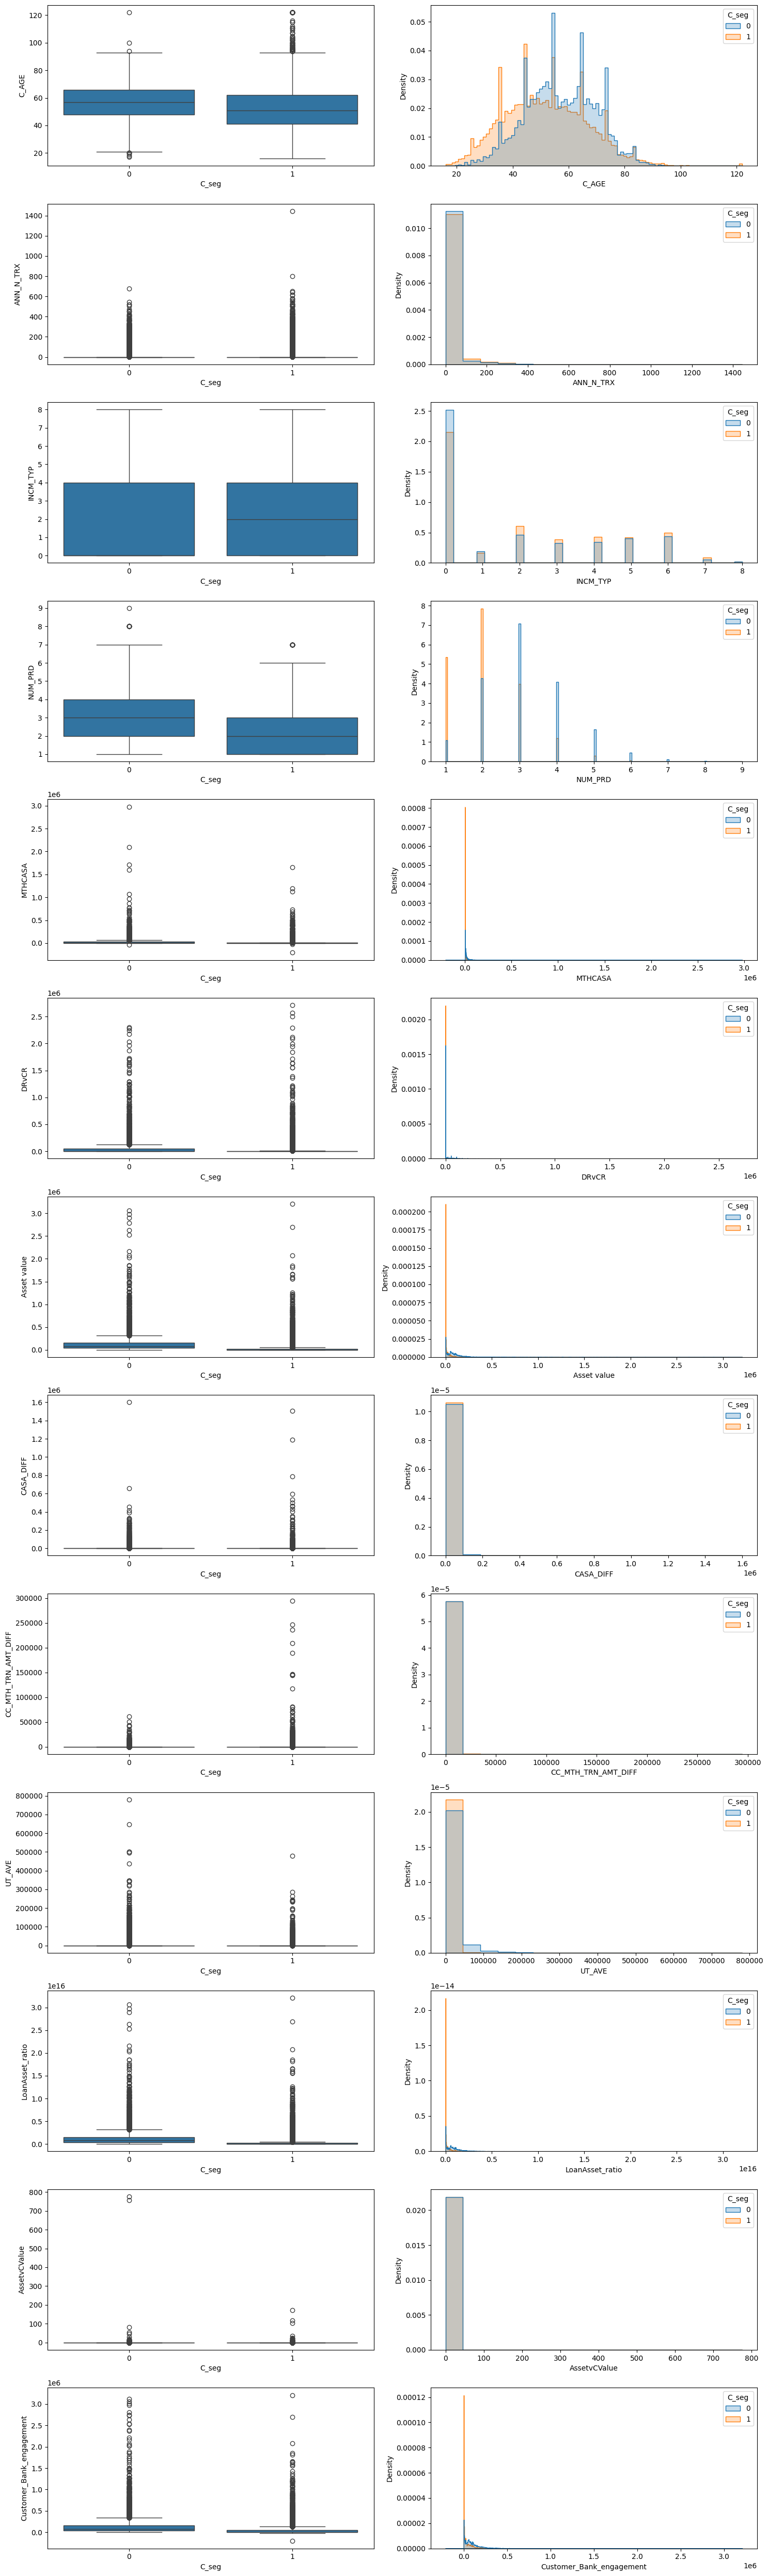

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df['C_seg'] = df['C_seg'].astype('category')
df['C_seg'] = df['C_seg'].cat.codes

# List of columns to create boxplots for
columns = ["C_AGE", 'ANN_N_TRX', 'INCM_TYP', 'NUM_PRD', 'MTHCASA', 'DRvCR','Asset value',"CASA_DIFF","CC_MTH_TRN_AMT_DIFF", 
           'UT_AVE', 'LoanAsset_ratio','AssetvCValue', 'Customer_Bank_engagement']

# Calculate number of rows needed for subplots
nrows = int(len(columns))

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 50))

# Create a boxplot and histogram on each subplot
for i, col in enumerate(columns):
    row = i 
    # col = 
    
    # Create boxplot
    sns.boxplot(x='C_seg', y=columns[i], data=df, ax=axes[row, 0])
    sns.histplot(data=df, x=columns[i], hue='C_seg', ax=axes[row, 1], element="step", stat="density", common_norm=False)
    # sns.violinplot(x='C_seg', y=columns[i], data=df, ax=axes[row, 1])

    # Create histogram

plt.tight_layout()
plt.show()



#### Plot to visualize correlation between numerical features

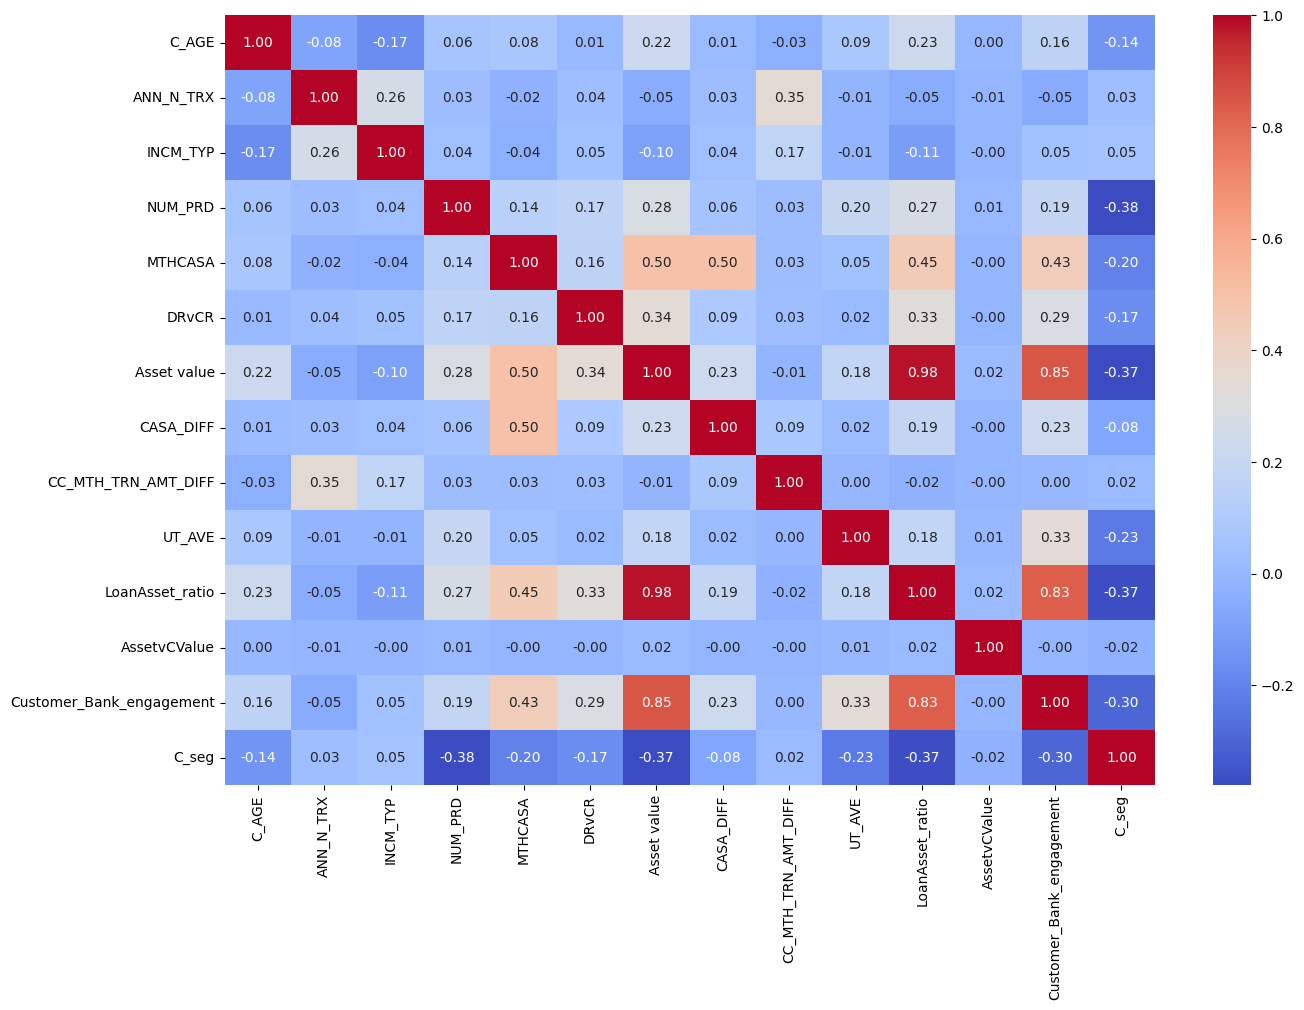

In [18]:
# create correlation graph with heatmap on specific column list
column_list = ['C_AGE', 'ANN_N_TRX', 'INCM_TYP', 'NUM_PRD', 'MTHCASA', 'DRvCR', 'Asset value', 'CASA_DIFF', 'CC_MTH_TRN_AMT_DIFF', 'UT_AVE', 'LoanAsset_ratio', 'AssetvCValue', 'Customer_Bank_engagement','C_seg']
corr = df[column_list].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Visualize interesting relationshio between Number of products vs segments.

This graph clearly strenthens our hypothesis drawn earlier.

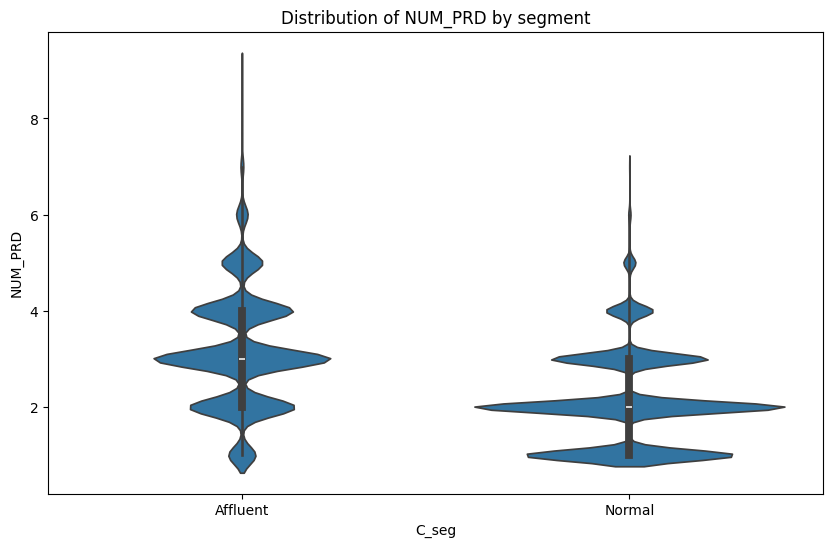

In [59]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='C_seg', y='NUM_PRD', data=df)
plt.title('Distribution of NUM_PRD by segment')
plt.xticks(ticks=[0,1], labels=['Affluent', 'Normal'], rotation=0)

plt.show()

#### Create one-hot encoded columns for each product

In [21]:
# Fill any Null values with 0
column_list = ['CASA_DIFF','CC_MTH_TRN_AMT_DIFF','LoanAsset_ratio','AssetvCValue','Customer_Bank_engagement']
df[column_list] = df[column_list].fillna(0)

In [91]:
df_cp = df.copy(deep=True)

#### Plot distribution of all products by their Customer segment

Insights:
1. maximum number of people who are Affluent holds CASA account followed by TD,CC,FUNDS and lastly LOAN.
2. There is a huge opportunity to upsell of different products within Affluent segment.
3. In TD account type , customers have a GAP between who are not affluent and owns TD account. More conversions seems possible from Normal to Affleunt in this product type.

/var/folders/yx/49mrr88n7wg_4mmyltrhrhdc0000gn/T/ipykernel_70494/1917051371.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Affluent', 'Normal'])
/var/folders/yx/49mrr88n7wg_4mmyltrhrhdc0000gn/T/ipykernel_70494/1917051371.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Affluent', 'Normal'])
/var/folders/yx/49mrr88n7wg_4mmyltrhrhdc0000gn/T/ipykernel_70494/1917051371.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Affluent', 'Normal'])
/var/folders/yx/49mrr88n7wg_4mmyltrhrhdc0000gn/T/ipykernel_70494/1917051371.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes

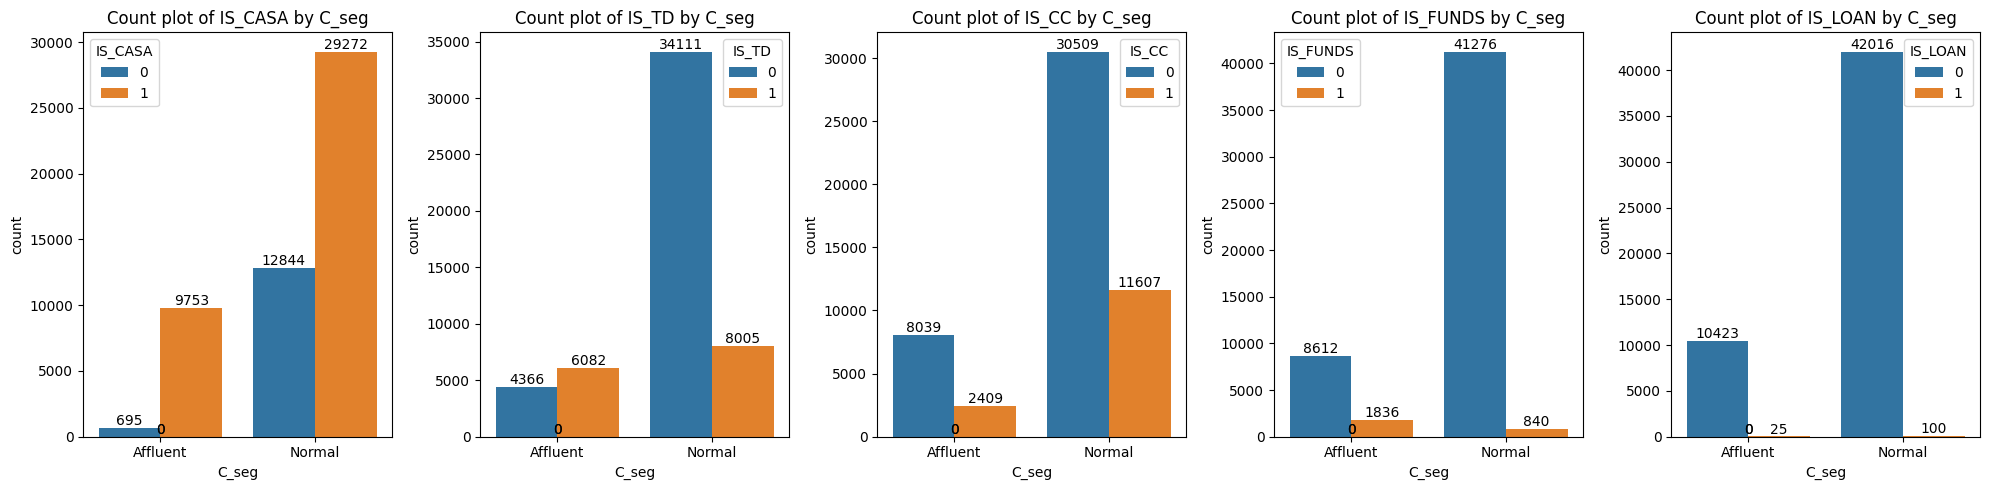

In [58]:
columns = [ 'IS_CASA', 'IS_TD', 'IS_CC', 'IS_FUNDS', 'IS_LOAN']

# Check if the columns exist in the dataframe
missing_columns = [col for col in columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing in the dataframe: {', '.join(missing_columns)}")

# show count graph for each column
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
for i, col in enumerate(columns):
    sns.countplot(x='C_seg', hue=col, data=df, ax=axes[i])
    # provide title for each plot
    axes[i].set_title(f"Count plot of {col} by C_seg")
    # display count on each bar
    for p in axes[i].patches:
        axes[i].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    axes[i].set_xticklabels(['Affluent', 'Normal'])

plt.tight_layout()
plt.show()

/var/folders/yx/49mrr88n7wg_4mmyltrhrhdc0000gn/T/ipykernel_70494/3224061977.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Affluent', 'Normal'])
/var/folders/yx/49mrr88n7wg_4mmyltrhrhdc0000gn/T/ipykernel_70494/3224061977.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Affluent', 'Normal'])
/var/folders/yx/49mrr88n7wg_4mmyltrhrhdc0000gn/T/ipykernel_70494/3224061977.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Affluent', 'Normal'])
/var/folders/yx/49mrr88n7wg_4mmyltrhrhdc0000gn/T/ipykernel_70494/3224061977.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes

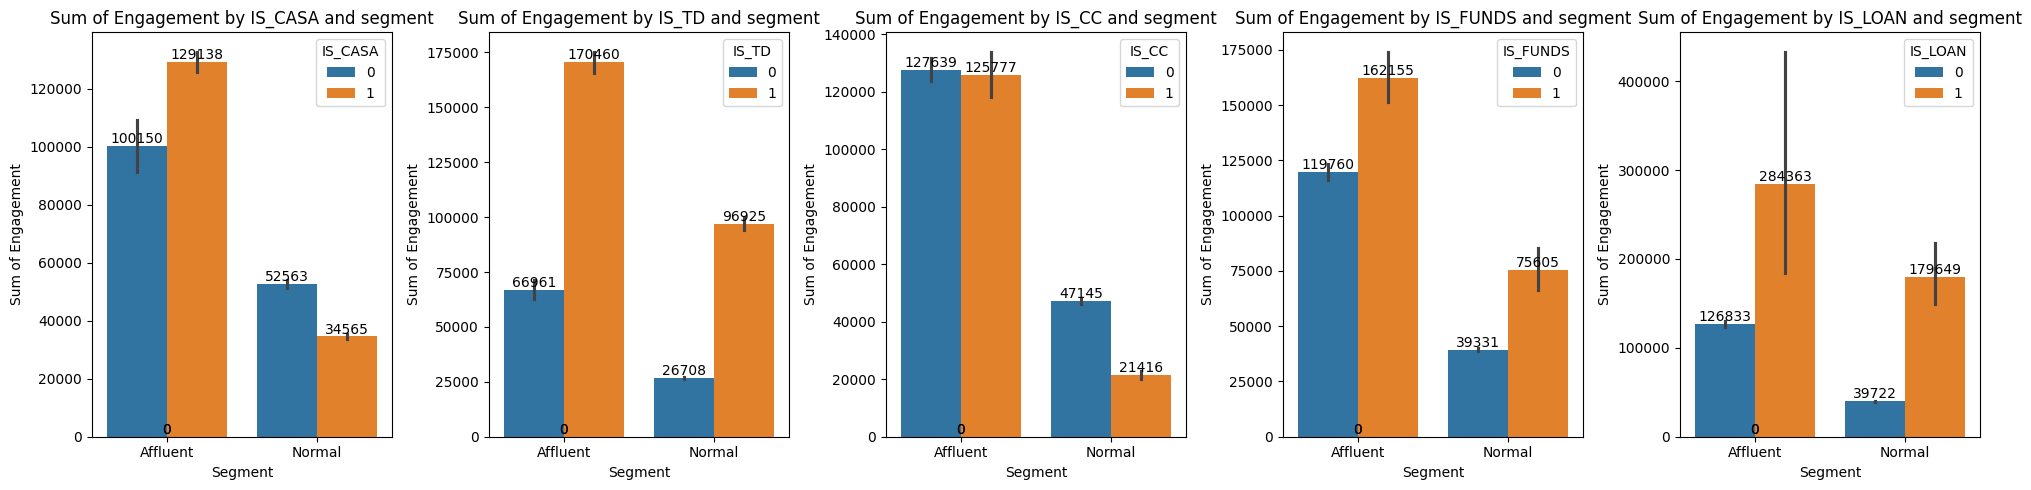

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_customer_engagement_by_product(df, columns):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 5))
    for i, col in enumerate(columns):
        sns.barplot(x='C_seg', y='Customer_Bank_engagement', hue=col, data=df, ax=axes[i])
        axes[i].set_title(f"Sum of Engagement by {col} and segment")
        for p in axes[i].patches:
            axes[i].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        # mark C_seg=0 to 'Affluent' and C_seg=1 to 'Normal' in plot
        axes[i].set_xticklabels(['Affluent', 'Normal'])
        axes[i].legend(title=col, loc='upper right')
        axes[i].set_xlabel('Segment')
        axes[i].set_ylabel('Sum of Engagement')
    plt.tight_layout()
    plt.show()

# Usage example:
plot_customer_engagement_by_product(df, columns)


In [23]:
# Show Loan product count by customer segment.
df.groupby(['IS_LOAN']).C_seg.value_counts()

IS_LOAN  C_seg
0        1        42016
         0        10423
1        1          100
         0           25
Name: count, dtype: int64

#### Visualize Customer segment data after data processing

Obviosuly we can see that data is skewed towards category = 0(affluent) , rightly so there are fewer affluent and that's why we want to have more people in affluent category.

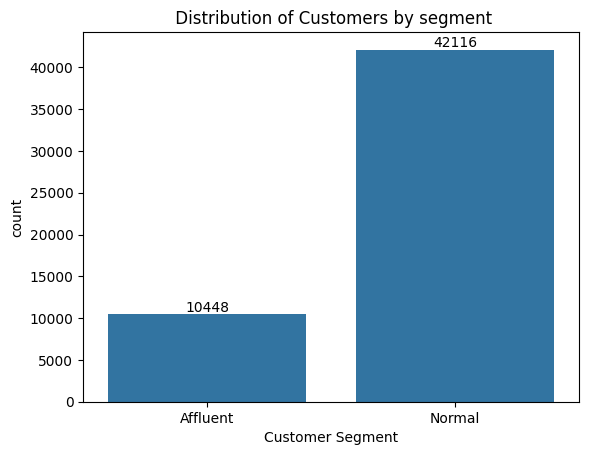

In [45]:
# visualize C_seg column with 2 category
sns.countplot(x='C_seg', data=df) 
plt.title(' Distribution of Customers by segment')
plt.xlabel('Customer Segment')
plt.xticks(ticks=[0,1], labels=['Affluent', 'Normal'], rotation=0)
# show values on bar
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Shows Importance of Having Affluent segment

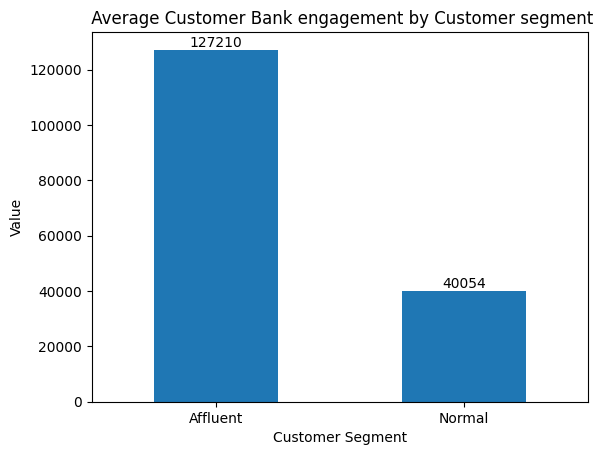

Affluent Customers count=  10448
Affluent Customers average engagement=  127210.35825038285
Total monetary value of Affluent Customers=  1329093823


In [41]:
(df.groupby('C_seg')['Customer_Bank_engagement'].sum() / df['C_seg'].value_counts()).plot(kind='bar')
plt.title(' Average Customer Bank engagement by Customer segment')
plt.xticks(ticks=[0,1], labels=['Affluent', 'Normal'], rotation=0)
# show values on bar
for i, v in enumerate((df.groupby('C_seg')['Customer_Bank_engagement'].sum() / df['C_seg'].value_counts())):
    plt.text(i, v, int(v), ha='center', va='bottom')
plt.ylabel('Value')
plt.xlabel('Customer Segment')
plt.show()

total_affluent_customers = df[df['C_seg'] == 0].shape[0]
Affluent_average_engagement = df[df['C_seg'] == 0]['Customer_Bank_engagement'].mean()
total_monetary_value_of_affluent_customers = df[df['C_seg'] == 0]['Customer_Bank_engagement'].sum()
print("Affluent Customers count= ", total_affluent_customers)
print("Affluent Customers average engagement= ", Affluent_average_engagement)
print("Total monetary value of Affluent Customers= ", total_monetary_value_of_affluent_customers)

In [25]:
filtered_feature_columns = ['Age_Group','C_EDU_Encoded','C_HSE_Encoded','C_OCC_Encoded','INCM_TYP','NUM_PRD','IS_CASA','CASATD_CNT','CASA_DIFF','DRvCR','IS_TD','IS_FUNDS','IS_CC','IS_LOAN','CC_MTH_TRN_AMT_DIFF','CC_LMT','LoanAsset_ratio','AssetvCValue','Customer_Bank_engagement','C_seg']

#create dataframe with fileterd columns
df_filtered = df[filtered_feature_columns]

In [26]:
# save the filtered dataframe to csv
df_filtered.to_csv('filtered_data.csv', index=True)

### Model Training

To look into code look for [model training notebook](./maybank_model_training.ipynb)